In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from keras.layers import Activation, Dense 
from keras.layers import Dropout

import seaborn as sb
import matplotlib.pyplot as mp

In [2]:
df1 = pd.read_csv('SOI.csv',encoding = "ISO-8859-1")

var = (df1[df1.columns[1:]].values).flatten()

print(var[13])

df1.columns

-0.6


Index(['YEAR Ê', 'ÊJAN Ê', 'ÊFEB Ê', 'ÊMAR Ê', 'ÊAPR Ê', 'ÊMAY Ê', 'ÊJUN Ê',
       'ÊJUL Ê', 'ÊAUG Ê', 'ÊSEP Ê', 'ÊOCT Ê', 'ÊNOV Ê', 'ÊDEC Ê Ê'],
      dtype='object')

To add year field to the dataframe

In [3]:
k = 0
lis = []
for i in range(853):
  if i%12 == 0 and i !=0:
    k = k+1
  lis.append(1951+k)
  
print(lis[:-1])

[1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1953, 1953, 1953, 1953, 1953, 1953, 1953, 1953, 1953, 1953, 1953, 1953, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1956, 1957, 1957, 1957, 1957, 1957, 1957, 1957, 1957, 1957, 1957, 1957, 1957, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1959, 1959, 1959, 1959, 1959, 1959, 1959, 1959, 1959, 1959, 1959, 1959, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 196

To add month field to the dataframe

In [4]:
k = 0
lis1 = []

Ind = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(853):
  if i%12 == 0 and i !=0:
    k = k+1
  lis1.append(Ind[i%12])
  
print(lis1[:-1])

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'

In [5]:
df2 = pd.DataFrame()
df2['year'] = lis[:-1]
df2['month'] = lis1[:-1]
df2

,year,month
0,1951,Jan
1,1951,Feb
2,1951,Mar
3,1951,Apr
4,1951,May
...,...,...
847,2021,Aug
848,2021,Sep
849,2021,Oct
850,2021,Nov


Adding ONI data as a feature to df2

In [6]:
df3 = pd.read_csv('ONI_1.csv',encoding = "ISO-8859-1")

var = (df3[df3.columns[2:]].values).flatten()

print(var[12])

df2['ONI'] = var

df2

-0.1


,year,month,ONI
0,1951,Jan,0.7
1,1951,Feb,0.9
2,1951,Mar,1.0
3,1951,Apr,1.2
4,1951,May,1.0
...,...,...,...
847,2021,Aug,-0.9
848,2021,Sep,-1.0
849,2021,Oct,-1.1
850,2021,Nov,-1.0


Adding Nino3.4 data as a feature to df2

In [7]:
df3 = pd.read_csv('nino3.4.csv',encoding = "ISO-8859-1")

var = (df3[df3.columns[1:]].values).flatten()
df2['nino3.4'] = var

df2.tail(20)

,year,month,ONI,nino3.4
832,2020,May,-1.3,-0.12
833,2020,Jun,-1.2,-0.21
834,2020,Jul,-1.1,-0.04
835,2020,Aug,-0.9,-0.42
836,2020,Sep,-0.8,-0.66
837,2020,Oct,-0.7,-1.19
838,2020,Nov,-0.5,-1.01
839,2020,Dec,-0.4,-0.98
840,2021,Jan,-0.4,-1.04
841,2021,Feb,-0.5,-0.94


Adding Precipitation data as a feature to df2

In [8]:
df3 = pd.read_csv('Precip.csv',encoding = "ISO-8859-1")

var = (df3[df3.columns[1:]].values).flatten()
df2['Precip'] = var

df2.tail(20)

,year,month,ONI,nino3.4,Precip
832,2020,May,-1.3,-0.12,68.39
833,2020,Jun,-1.2,-0.21,69.04
834,2020,Jul,-1.1,-0.04,74.50
835,2020,Aug,-0.9,-0.42,63.26
836,2020,Sep,-0.8,-0.66,56.36
837,2020,Oct,-0.7,-1.19,56.77
838,2020,Nov,-0.5,-1.01,51.30
839,2020,Dec,-0.4,-0.98,50.52
840,2021,Jan,-0.4,-1.04,49.05
841,2021,Feb,-0.5,-0.94,48.78


Adding PNA data as a feature to df2

In [9]:
df3 = pd.read_csv('PNA.csv',encoding = "ISO-8859-1")

var = (df3[df3.columns[1:]].values).flatten()
df2['PNA'] = var

df2.tail(20)

,year,month,ONI,nino3.4,Precip,PNA
832,2020,May,-1.3,-0.12,68.39,0.21
833,2020,Jun,-1.2,-0.21,69.04,0.70
834,2020,Jul,-1.1,-0.04,74.50,1.73
835,2020,Aug,-0.9,-0.42,63.26,1.82
836,2020,Sep,-0.8,-0.66,56.36,0.75
837,2020,Oct,-0.7,-1.19,56.77,-1.13
838,2020,Nov,-0.5,-1.01,51.30,0.24
839,2020,Dec,-0.4,-0.98,50.52,1.58
840,2021,Jan,-0.4,-1.04,49.05,0.19
841,2021,Feb,-0.5,-0.94,48.78,-0.31


Adding SOI data as a feature to df2

In [10]:
df3 = pd.read_csv('SOI.csv',encoding = "ISO-8859-1")

var = (df3[df3.columns[1:]].values).flatten()
df2['SOI'] = var

df2.tail(20)

,year,month,ONI,nino3.4,Precip,PNA,SOI
832,2020,May,-1.3,-0.12,68.39,0.21,0.4
833,2020,Jun,-1.2,-0.21,69.04,0.70,-0.4
834,2020,Jul,-1.1,-0.04,74.50,1.73,0.4
835,2020,Aug,-0.9,-0.42,63.26,1.82,1.1
836,2020,Sep,-0.8,-0.66,56.36,0.75,0.9
837,2020,Oct,-0.7,-1.19,56.77,-1.13,0.5
838,2020,Nov,-0.5,-1.01,51.30,0.24,0.7
839,2020,Dec,-0.4,-0.98,50.52,1.58,1.8
840,2021,Jan,-0.4,-1.04,49.05,0.19,1.9
841,2021,Feb,-0.5,-0.94,48.78,-0.31,1.5


In [11]:
df4 = df2[df2.columns[2:7]]
df4.tail(20)

,ONI,nino3.4,Precip,PNA,SOI
832,-1.3,-0.12,68.39,0.21,0.4
833,-1.2,-0.21,69.04,0.70,-0.4
834,-1.1,-0.04,74.50,1.73,0.4
835,-0.9,-0.42,63.26,1.82,1.1
836,-0.8,-0.66,56.36,0.75,0.9
837,-0.7,-1.19,56.77,-1.13,0.5
838,-0.5,-1.01,51.30,0.24,0.7
839,-0.4,-0.98,50.52,1.58,1.8
840,-0.4,-1.04,49.05,0.19,1.9
841,-0.5,-0.94,48.78,-0.31,1.5


In [12]:
def z_score_standardization(series):
    return (series - series.mean()) / series.std()
df2['Precip'] = z_score_standardization(df2['Precip'])

df2

,year,month,ONI,nino3.4,Precip,PNA,SOI
0,1951,Jan,0.7,-1.13,-0.505190,-0.41,1.5
1,1951,Feb,0.9,-0.74,-0.678525,-1.36,0.9
2,1951,Mar,1.0,-0.77,-0.272972,-0.81,-0.1
3,1951,Apr,1.2,-0.17,-0.542511,0.73,-0.3
4,1951,May,1.0,-0.10,-0.562416,1.26,-0.7
...,...,...,...,...,...,...,...
847,2021,Aug,-0.9,-0.38,1.512620,0.95,0.6
848,2021,Sep,-1.0,-0.50,-0.029972,0.44,0.8
849,2021,Oct,-1.1,-0.78,1.663562,1.13,0.7
850,2021,Nov,-1.0,-0.88,-2.409380,0.72,1.0


In [13]:
df12 = pd.read_csv('ONI_1.csv',encoding = "ISO-8859-1")
Enso_type = df12['ENSO Type'].values.tolist()
len(Enso_type)

71

In [14]:
df2.columns

Index(['year', 'month', 'ONI', 'nino3.4', 'Precip', 'PNA', 'SOI'], dtype='object')

Adding ENSO_Type in each year

In [15]:
k = 0
lis1 = []

Ind = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(852):
  if i%12 == 0 and i !=0:
    k = k+1
  lis1.append(Enso_type[k])
  
print((lis1[:-1]))

['ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'ML', 'ML', 'ML', 'ML', 'ML', 'ML', 'ML', 'ML', 'ML', 'ML', 'ML', 'ML', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'SE', 'SE', 'SE', 'SE', 'SE', 'SE', 'SE', 'SE', 'SE', 'SE', 'SE', 'SE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', 'WE', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'WL', 'SE', 'SE', 'SE', 'SE', 'SE', 'SE', 'SE', 'SE', 'SE

In [16]:
df2['Enso_type'] = lis1
df2

,year,month,ONI,nino3.4,Precip,PNA,SOI,Enso_type
0,1951,Jan,0.7,-1.13,-0.505190,-0.41,1.5,ME
1,1951,Feb,0.9,-0.74,-0.678525,-1.36,0.9,ME
2,1951,Mar,1.0,-0.77,-0.272972,-0.81,-0.1,ME
3,1951,Apr,1.2,-0.17,-0.542511,0.73,-0.3,ME
4,1951,May,1.0,-0.10,-0.562416,1.26,-0.7,ME
...,...,...,...,...,...,...,...,...
847,2021,Aug,-0.9,-0.38,1.512620,0.95,0.6,ML
848,2021,Sep,-1.0,-0.50,-0.029972,0.44,0.8,ML
849,2021,Oct,-1.1,-0.78,1.663562,1.13,0.7,ML
850,2021,Nov,-1.0,-0.88,-2.409380,0.72,1.0,ML


Graph to demonstrate the trends of all the SST indexes over the past 72 years

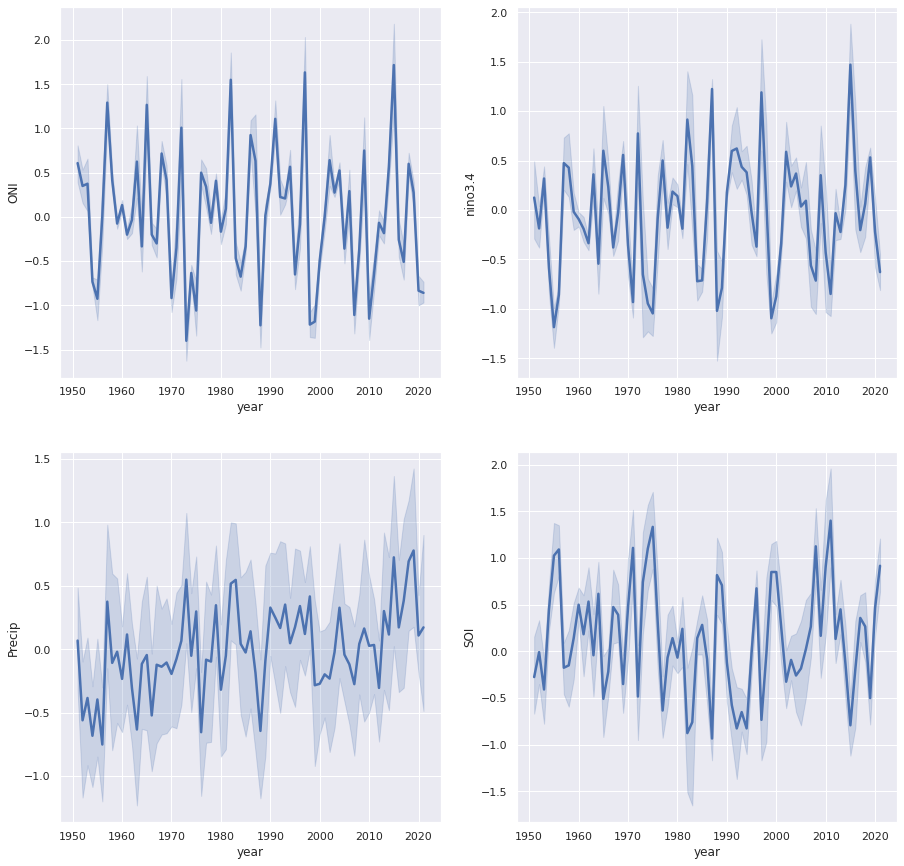

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(2,2,figsize=(15, 15))


sns.lineplot(data=df2, x = 'year', y = 'ONI',palette="tab10", linewidth=2.5, ax=axes[0,0])

sns.lineplot(data=df2, x = 'year', y = 'nino3.4',palette="tab10", linewidth=2.5, ax=axes[0,1])
sns.lineplot(data=df2, x = 'year', y = 'Precip',palette="tab10", linewidth=2.5, ax=axes[1,0])
sns.lineplot(data=df2, x = 'year', y = 'SOI',palette="tab10", linewidth=2.5, ax=axes[1,1])


Graph to demonstrate the trends of all the SST indices and the corresponding ENSO_Type

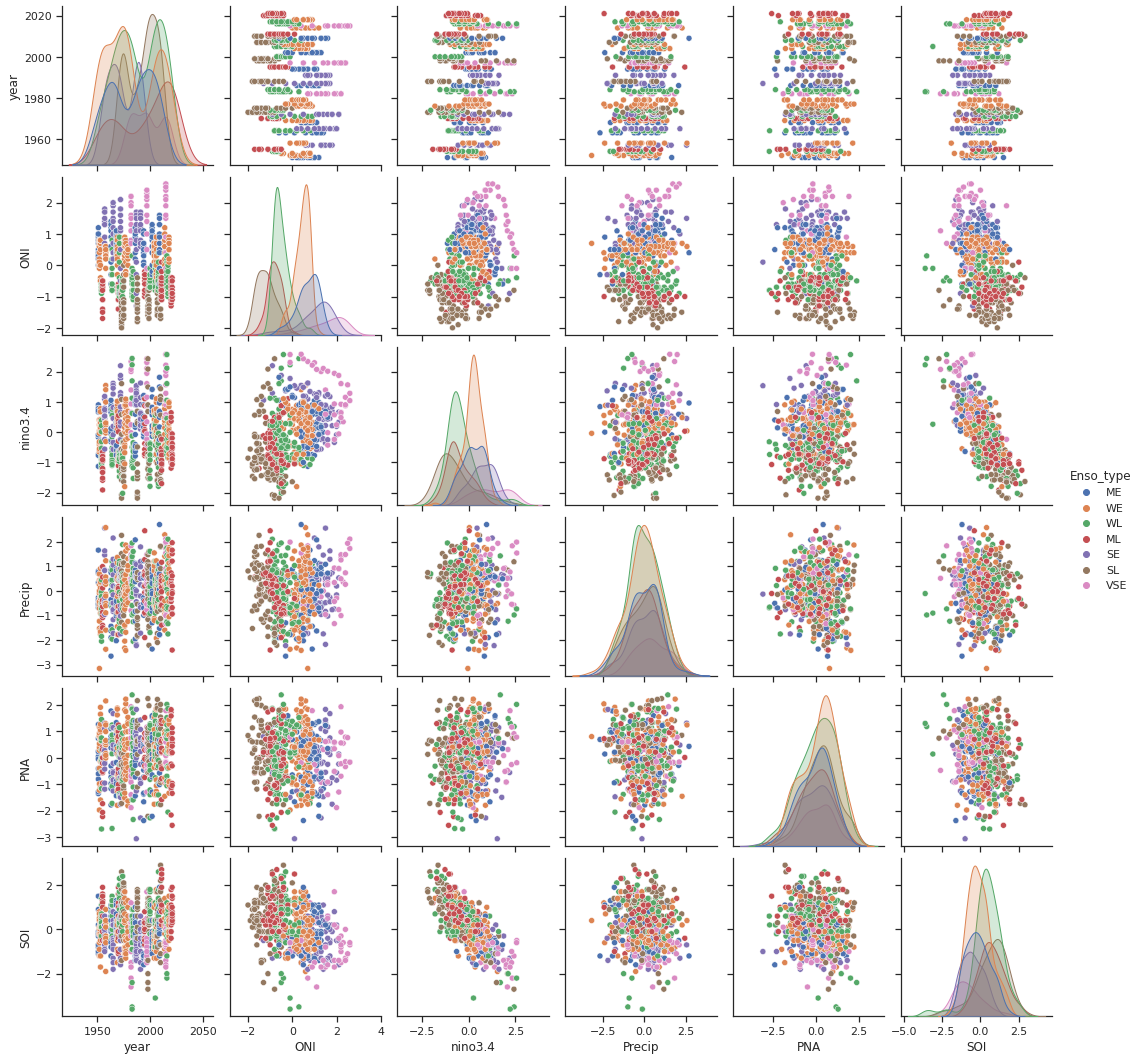

In [18]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df2, hue="Enso_type")

**WE=Weak El Niño, ME=Moderate El Niño, SE=Strong El Niño, VSE=Very Strong El Niño**


**WL=Weak La Niña, ML=Moderate La Niña, SL=Strong La Niña**

ONI Trends over the years

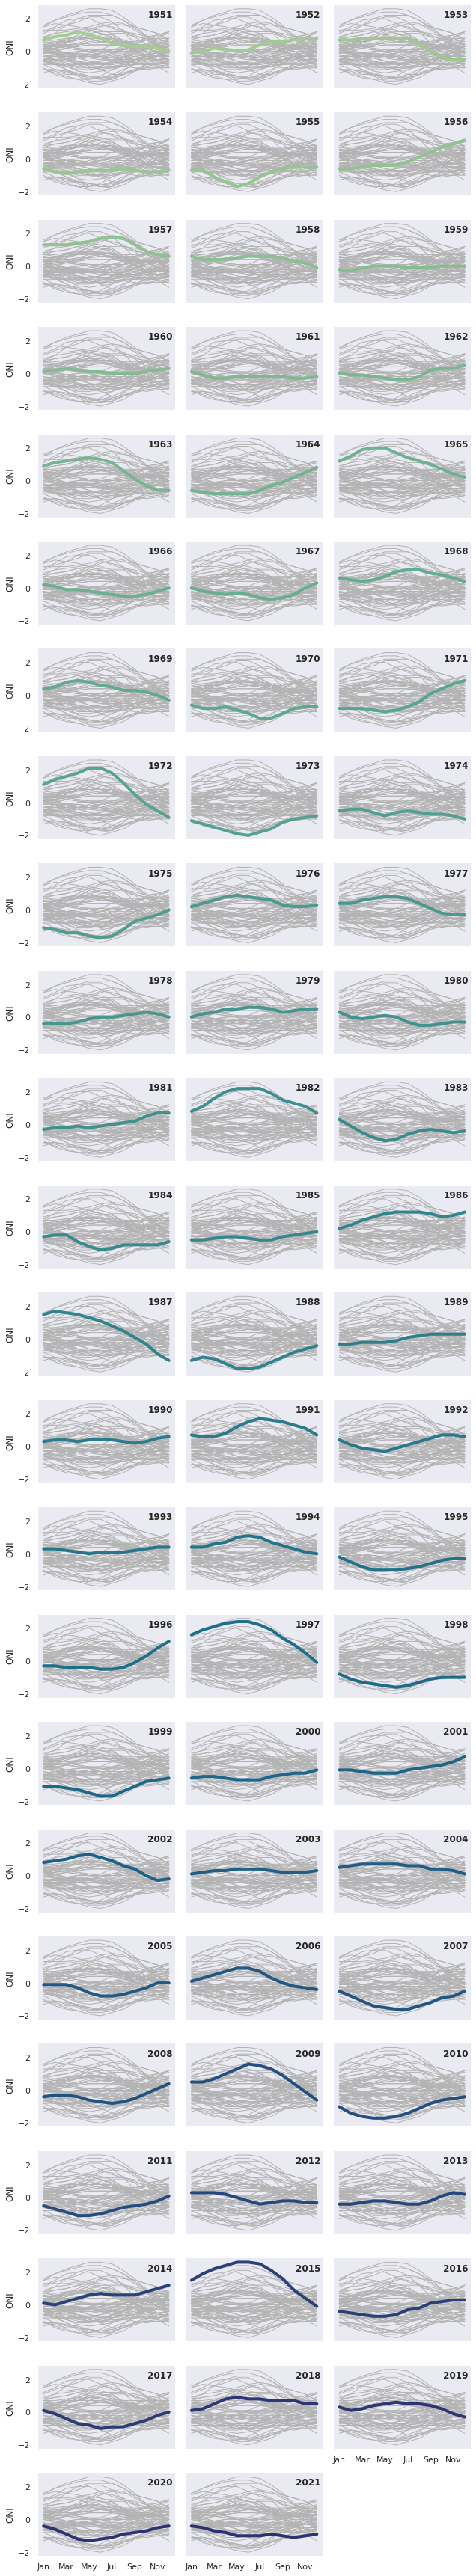

In [19]:
import seaborn as sns

sns.set_theme(style="dark")
flights = df2

# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="ONI", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="month", y="ONI", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "ONI")
g.tight_layout()

In [20]:
df = df2

In [21]:
col_names = ['ONI', 'nino3.4', 'PNA', 'Precip', 'SOI']
for col in col_names:
    mode_value = df[col].mode().values
    df[col].fillna(mode_value[0], inplace = True)

In [22]:
df = df2
df = df[df2.columns[2:7]]
df

,ONI,nino3.4,Precip,PNA,SOI
0,0.7,-1.13,-0.505190,-0.41,1.5
1,0.9,-0.74,-0.678525,-1.36,0.9
2,1.0,-0.77,-0.272972,-0.81,-0.1
3,1.2,-0.17,-0.542511,0.73,-0.3
4,1.0,-0.10,-0.562416,1.26,-0.7
...,...,...,...,...,...
847,-0.9,-0.38,1.512620,0.95,0.6
848,-1.0,-0.50,-0.029972,0.44,0.8
849,-1.1,-0.78,1.663562,1.13,0.7
850,-1.0,-0.88,-2.409380,0.72,1.0


All input variables must be on the same row as their corresponding output variables for the majority of supervised learning methods. In SOI prediction, the objective is to forecast the SOI of the following time steps by using the variables (i.e., oni, nino3, pna, and soi) of the previous time steps (for example, 12). (e.g. 3). The sliding window approach (also known as the window or lag method) in time series analysis and prediction is the formal name for the strategy of using previous time steps to forecast the upcoming time step. Define a process to convert Panda time series into a format that supervised learning algorithms can use.

Reference: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [23]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i).iloc[:,-1])
        if i == 0:
            names += ['VAR(t)']
        else:
            names += ['VAR(t+%d)' % i]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [24]:
enso = df.values.astype('float32')
lag = 12
ahead = 3
n_features = 1
reframed = series_to_supervised(enso, lag, ahead)

reframed


,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),VAR(t),VAR(t+1),VAR(t+2)
12,0.7,-1.13,-0.505190,-0.41,1.5,0.9,-0.74,-0.678525,-1.36,0.9,...,0.23,-0.8,0.0,0.71,0.763716,-1.29,-0.7,-0.9,-0.6,0.5
13,0.9,-0.74,-0.678525,-1.36,0.9,1.0,-0.77,-0.272972,-0.81,-0.1,...,-1.29,-0.7,-0.1,0.39,-0.089686,-1.98,-0.9,-0.6,0.5,-0.2
14,1.0,-0.77,-0.272972,-0.81,-0.1,1.2,-0.17,-0.542511,0.73,-0.3,...,-1.98,-0.9,0.0,0.24,-1.232531,0.28,-0.6,0.5,-0.2,0.8
15,1.2,-0.17,-0.542511,0.73,-0.3,1.0,-0.10,-0.562416,1.26,-0.7,...,0.28,-0.6,0.2,0.04,0.436952,-0.40,0.5,-0.2,0.8,0.7
16,1.0,-0.10,-0.562416,1.26,-0.7,0.8,-0.09,1.662732,-0.61,0.2,...,-0.40,0.5,0.1,0.41,-0.404839,1.16,-0.2,0.8,0.7,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,-1.2,-0.21,0.737177,0.70,-0.4,-1.1,-0.04,1.190003,1.73,0.4,...,-1.05,0.3,-1.0,-0.41,0.613604,-1.35,0.5,0.4,1.4,0.6
846,-1.1,-0.04,1.190003,1.73,0.4,-0.9,-0.42,0.257812,1.82,1.1,...,-1.35,0.5,-1.0,-0.06,1.214883,0.67,0.4,1.4,0.6,0.8
847,-0.9,-0.42,0.257812,1.82,1.1,-0.8,-0.66,-0.314440,0.75,0.9,...,0.67,0.4,-1.0,-0.20,1.963787,0.56,1.4,0.6,0.8,0.7
848,-0.8,-0.66,-0.314440,0.75,0.9,-0.7,-1.19,-0.280436,-1.13,0.5,...,0.56,1.4,-0.9,-0.38,1.512620,0.95,0.6,0.8,0.7,1.0


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from keras.layers import Activation, Dense 
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD


In [45]:
values = reframed.values
n_train = int(len(values) * 0.8)
train = values[:n_train, :]
test = values[n_train:, :]

X, y = train[:, :-ahead], train[:, -ahead:]

X = X.reshape(X.shape[0], lag, int(X.shape[1]/lag))

model = keras.Sequential()
# model.add(LSTM(30, batch_input_shape=(1, X.shape[1], X.shape[2]), stateful=True))
model.add(LSTM(50, batch_input_shape=(1, X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(ahead))

opt = SGD(lr=0.0005, momentum=0.0)

model.compile(loss='mean_squared_error', optimizer=opt)

# fit the NN
for i in range(200):
  model.fit(X, y, epochs=1, batch_size=1, verbose=2, shuffle=False)
  model.reset_states()





670/670 - 7s - loss: 0.7634 - 7s/epoch - 10ms/step
670/670 - 7s - loss: 0.6396 - 7s/epoch - 11ms/step
670/670 - 7s - loss: 0.5686 - 7s/epoch - 11ms/step
670/670 - 4s - loss: 0.5222 - 4s/epoch - 6ms/step
670/670 - 4s - loss: 0.5021 - 4s/epoch - 6ms/step
670/670 - 4s - loss: 0.4850 - 4s/epoch - 6ms/step
670/670 - 4s - loss: 0.4734 - 4s/epoch - 6ms/step
670/670 - 4s - loss: 0.4694 - 4s/epoch - 6ms/step
670/670 - 4s - loss: 0.4590 - 4s/epoch - 6ms/step
670/670 - 4s - loss: 0.4583 - 4s/epoch - 6ms/step
670/670 - 4s - loss: 0.4517 - 4s/epoch - 6ms/step
670/670 - 5s - loss: 0.4514 - 5s/epoch - 7ms/step
670/670 - 5s - loss: 0.4525 - 5s/epoch - 7ms/step
670/670 - 4s - loss: 0.4481 - 4s/epoch - 6ms/step
670/670 - 4s - loss: 0.4482 - 4s/epoch - 6ms/step
670/670 - 4s - loss: 0.4416 - 4s/epoch - 6ms/step
670/670 - 4s - loss: 0.4480 - 4s/epoch - 6ms/step
670/670 - 4s - loss: 0.4424 - 4s/epoch - 6ms/step
670/670 - 4s - loss: 0.4386 - 4s/epoch - 6ms/step
670/670 - 5s - loss: 0.4378 - 5s/epoch - 7ms/st

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 12, 30)               4320      
                                                                 
 dropout (Dropout)           (1, 12, 30)               0         
                                                                 
 lstm_1 (LSTM)               (1, 50)                   16200     
                                                                 
 dropout_1 (Dropout)         (1, 50)                   0         
                                                                 
 dense (Dense)               (1, 3)                    153       
                                                                 
Total params: 20,673
Trainable params: 20,673
Non-trainable params: 0
_________________________________________________________________


In [28]:
# predict the SOI values for next three time steps given a single input sample 
def forecast_lstm(model, X, n_batch, n_lag):
    # reshape input pattern to [samples, timesteps, features]
    X = X.reshape(1, n_lag, int(len(X)/n_lag))
    # make forecast
    forecast = model.predict(X, batch_size=n_batch)
    # convert to array
    return [x for x in forecast[0, :]]

# make prediciton for a list of input samples
def make_forecasts(model, n_batch, train, test, n_lag, n_ahead):
    forecasts = list()
    for i in range(len(test)):
        X = test[i, :-n_ahead]
        # make forecast
        forecast = forecast_lstm(model, X, n_batch, n_lag)
        # store the forecast
        forecasts.append(forecast)
    return forecasts

In [29]:
forecasts = make_forecasts(model, 1, train, test, lag, ahead)
# pring out the output for the first input sample


In [31]:
from sklearn.metrics import f1_score
print(np.shape(train))
print(df['ONI'].iloc[670:])
#print(test)

print(forecasts)
# f1_score(df4['SOI'].iloc[670:],forecasts)

(670, 63)
670   -0.3
671   -0.4
672   -0.5
673   -0.8
674   -1.1
      ... 
847   -0.9
848   -1.0
849   -1.1
850   -1.0
851   -0.9
Name: ONI, Length: 182, dtype: float64
[[0.84298, 1.5716367, 1.372249], [1.8220923, 1.1373321, 0.86068743], [1.2678726, 1.0553871, 1.3432686], [0.96199954, 1.5539515, 0.91364413], [1.3835769, 0.84942997, 0.67118084], [0.95737845, 0.4593462, 0.27648368], [0.51027524, 0.23331448, 0.24772704], [0.17335507, 0.18652625, 0.11177489], [0.28741077, 0.08609321, 0.5555417], [0.081996724, 0.4718697, -0.019246027], [0.3964954, -0.09323657, 0.07082528], [-0.13771601, -0.08433859, 0.42253846], [-0.23239005, 0.36454684, 0.5530094], [0.1432678, 0.64994526, 0.9490169], [0.3129889, 1.1196773, 0.72538805], [1.147453, 0.84971166, 0.8164837], [0.8073883, 1.0125278, 0.34591234], [1.1712421, 0.20220871, 0.14932552], [0.116067976, 0.02221056, -0.1384376], [-0.33333293, -0.43041182, -0.7067778], [-0.61164135, -0.84783816, -0.8564174], [-1.0231541, -0.98729694, -1.1340885], [-1.0931

In [32]:
import math
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from keras.layers import Activation, Dense 
from keras.layers import Dropout

In [33]:
def evaluate_forecasts(y, forecasts, n_lag, n_seq):
    print('Evaluation results (RMSE) for each next tim step:')
    for i in range(n_seq):
        actual = [row[i] for row in y]
        predicted = [forecast[i] for forecast in forecasts]
        rmse = math.sqrt(mean_squared_error(actual, predicted))
        print('t+%d time step: %f' % ((i+1), rmse))
        
# evaluate forecasts
actual = [row[-ahead:] for row in test]
evaluate_forecasts(actual, forecasts, lag, ahead)

Evaluation results (RMSE) for each next tim step:
t+1 time step: 0.727893
t+2 time step: 0.731679
t+3 time step: 0.740268


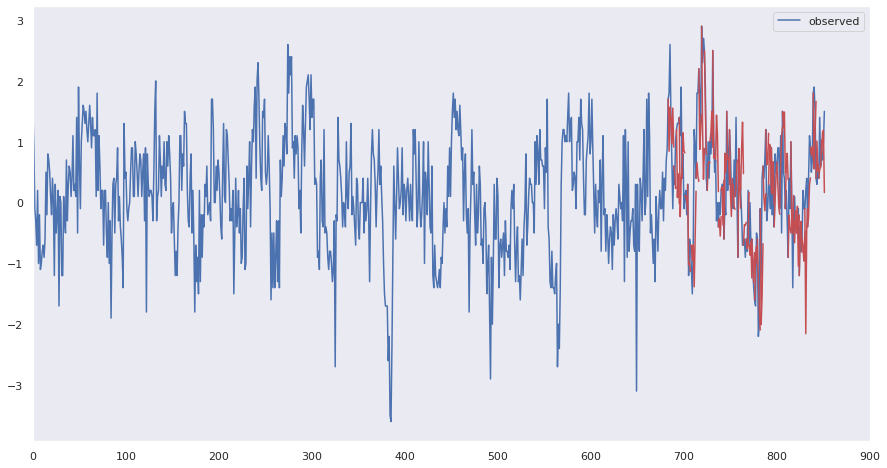

In [44]:
def plot_forecasts(series, forecasts, n_test, xlim, ylim, n_ahead, linestyle = None):
    pyplot.figure(figsize=(15,8))
    if linestyle==None:
        pyplot.plot(series, label='observed')
    else:
        pyplot.plot(series, linestyle, label='observed')
    pyplot.xlim(xlim, ylim)
    pyplot.legend(loc='upper right')
    # plot the forecasts in red
    for i in range(len(forecasts)):
        # this ensures not all segements are plotted, it is plotted every n_ahead
        if i%n_ahead ==0:
               off_s = len(series) - n_test + 2 + i - 1
               off_e = off_s + len(forecasts[i]) + 1
               xaxis = [x for x in range(off_s, off_e)]
               yaxis = [series[off_s]] + forecasts[i] 
               pyplot.plot(xaxis, yaxis, 'r')
    pyplot.show()
    
plot_forecasts(df['SOI'].values, forecasts, test.shape[0] + ahead - 1, 0, 900, ahead)